In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

### **Data Exploration**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/cs6304/final_dataset/Final_1.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)

In [3]:
df.head()

,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf
0,1533.0,"*DIGBOI, TINSUKIA DISTT.,Â Â ASSAM",Assam,23.5,6.6,6.5,748.0,1.4,7.0,18.0,12000.0,46.167450,2
1,1534.0,"*KARBIÂ Â ANGLONG DISTT., ASSAM",Assam,23.5,6.6,6.4,338.0,1.1,0.7,75.0,5500.0,40.826550,2
2,1535.0,"*SIBSAGAR , ASSAM",Assam,24.5,6.6,7.0,333.0,1.4,0.5,0.0,91.0,51.027703,1
3,1536.0,"*SIBSAGAR, ASSAM",Assam,22.5,6.6,5.7,791.0,1.9,0.3,0.0,46.0,32.954697,2
4,1537.0,"*(JORHAT, ASSAM",Assam,24.5,6.6,7.0,510.0,2.2,3.1,54.0,3350.0,60.342890,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   STATION CODE  1598 non-null   float64
 1   LOCATIONS     1598 non-null   object 
 2   STATE         1598 non-null   object 
 3   Temp          1598 non-null   float64
 4   DO            1598 non-null   float64
 5   PH            1598 non-null   float64
 6   Conductivity  1598 non-null   float64
 7   BOD           1598 non-null   float64
 8   NI            1598 non-null   float64
 9   Fec_col       1598 non-null   float64
 10  Tot_col       1598 non-null   float64
 11  WQI           1598 non-null   float64
 12  WQI clf       1598 non-null   int64  
dtypes: float64(10), int64(1), object(2)
memory usage: 162.4+ KB


In [5]:
df.describe()

,STATION CODE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf
count,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1598.000000,1.598000e+03,1.598000e+03,1.598000e+03,1598.000000
mean,1933.842929,25.375788,6.485426,7.554343,1093.423942,5.275751,1.581133,7.979965e+04,2.947906e+05,1.924202e+03,0.573217
std,649.277632,4.084991,1.710130,0.592710,2868.888805,9.769687,2.397786,1.631489e+06,4.245872e+06,3.677602e+04,0.685722
min,3.000000,2.500000,0.000000,3.200000,0.750000,0.000000,0.000000,0.000000e+00,0.000000e+00,3.136763e+00,0.000000
25%,1486.000000,23.712500,6.222500,7.300000,253.000000,1.500000,0.250000,9.000000e+00,1.272500e+02,6.208652e+01,0.000000
50%,1904.500000,26.000000,6.600000,7.700000,436.190000,2.400000,0.790000,1.200000e+02,5.541700e+02,7.747785e+01,0.000000
75%,2321.000000,28.000000,7.307500,7.900000,883.000000,3.900000,1.700000,4.927500e+02,1.600000e+03,1.293925e+02,1.000000
max,3475.000000,37.000000,11.700000,10.080000,28914.000000,82.170000,16.800000,4.878477e+07,1.336487e+08,1.092678e+06,3.000000


In [6]:
df.corr(method='spearman')

,STATION CODE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf
STATION CODE,1.000000,0.029904,-0.153768,-0.142128,0.045741,0.080709,-0.066874,-0.046877,-0.064904,0.003487,-0.021426
Temp,0.029904,1.000000,-0.211720,-0.050606,0.194004,-0.021300,0.032751,-0.013307,-0.092421,0.000810,-0.004786
DO,-0.153768,-0.211720,1.000000,0.138266,-0.356654,-0.291187,-0.077447,0.099340,0.067903,-0.250129,0.198380
PH,-0.142128,-0.050606,0.138266,1.000000,0.150198,0.180177,-0.072197,0.188163,0.143779,0.479147,-0.479790
Conductivity,0.045741,0.194004,-0.356654,0.150198,1.000000,0.189030,0.241897,-0.146801,-0.127176,0.170021,-0.137076
BOD,0.080709,-0.021300,-0.291187,0.180177,0.189030,1.000000,0.037905,0.281798,0.278397,0.750767,-0.680387
NI,-0.066874,0.032751,-0.077447,-0.072197,0.241897,0.037905,1.000000,-0.080436,-0.104116,-0.053127,0.042317
Fec_col,-0.046877,-0.013307,0.099340,0.188163,-0.146801,0.281798,-0.080436,1.000000,0.788830,0.590537,-0.496050
Tot_col,-0.064904,-0.092421,0.067903,0.143779,-0.127176,0.278397,-0.104116,0.788830,1.000000,0.560305,-0.473816
WQI,0.003487,0.000810,-0.250129,0.479147,0.170021,0.750767,-0.053127,0.590537,0.560305,1.000000,-0.879043


### **Finding the most important features**

**Chi-squared test**

In [7]:
from scipy.stats import chi2_contingency
from itertools import permutations

temp_df = df.select_dtypes(exclude=[np.int64,np.float64])
list_of_perms = list(permutations(temp_df.columns,2))
rows, cols = [], []
for i,v in list_of_perms:
    rows.append(i)
    cols.append(v)

table = pd.DataFrame(index=pd.Series(rows).unique(),columns=pd.Series(rows).unique())
p_values = []
for i,v in list_of_perms:
    stat, p, dof, expected = chi2_contingency(np.array(pd.crosstab(temp_df[i],temp_df[v])))
    p_values.append(p)

for i,v in list_of_perms:
    idx = 0
    if p_values[idx] <= 0.05:
        table.loc[i,v] = 'N'
    else:
        table.loc[i,v] = 'I'
    idx+=1

In [8]:
table

,LOCATIONS,STATE
LOCATIONS,NaN,N
STATE,N,NaN


**Spearman correlation test**

In [9]:
temp_df = df.select_dtypes(include=[np.int64,np.float64])

In [10]:
corr_matrix = temp_df.corr(method='spearman')
corr_matrix = corr_matrix.abs()

In [11]:
results = []
for i in np.array(corr_matrix).flatten():
    if i >= 0.8:
        results.append('N')
    else:
        results.append('I')

In [12]:
corr_matrix.loc[:,:] = np.array(results).reshape(len(temp_df.columns),-1)

In [13]:
corr_matrix

,STATION CODE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,WQI,WQI clf
STATION CODE,N,I,I,I,I,I,I,I,I,I,I
Temp,I,N,I,I,I,I,I,I,I,I,I
DO,I,I,N,I,I,I,I,I,I,I,I
PH,I,I,I,N,I,I,I,I,I,I,I
Conductivity,I,I,I,I,N,I,I,I,I,I,I
BOD,I,I,I,I,I,N,I,I,I,I,I
NI,I,I,I,I,I,I,N,I,I,I,I
Fec_col,I,I,I,I,I,I,I,N,I,I,I
Tot_col,I,I,I,I,I,I,I,I,N,I,I
WQI,I,I,I,I,I,I,I,I,I,N,N


**Principal Component Analysis (PCA)**

In [14]:
from sklearn.decomposition import PCA

pca = PCA()

reduced = pca.fit_transform(temp_df)

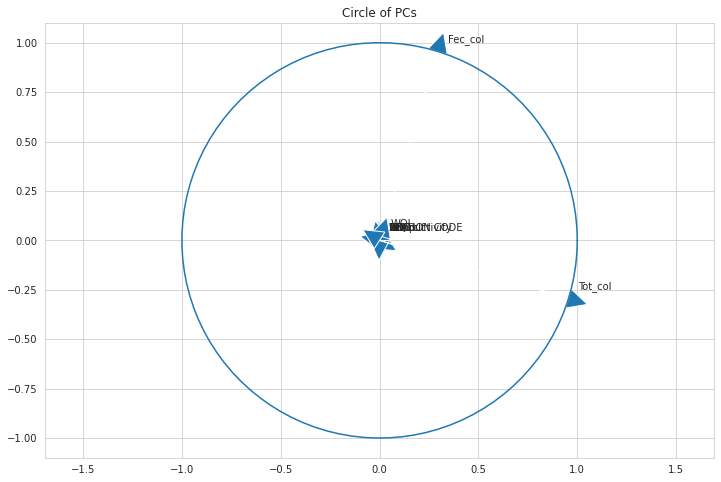

In [15]:
(fig,ax)=plt.subplots(figsize=(12,8)) 
for i in range(0,len(pca.components_)):
    ax.arrow(0,0,pca.components_[0,i],pca.components_[1,i], head_width=0.1,head_length=0.1)
for i in range(0,len(pca.components_)):
    plt.text(pca.components_[0,i]+0.05,pca.components_[1,i]+0.05,temp_df.columns.values[i])
an = np.linspace(0,2*np.pi,100)
plt.plot(np.cos(an),np.sin(an)) 
plt.axis('equal')
ax.set_title('Circle of PCs')
plt.show()

Looks like Tot_col and Fec_col are the most important parameters

### **Model Building**

In [16]:
X  = df.select_dtypes(include=[np.int64,np.float64])
X = X[X.columns[:-2]]
y_reg = df[df.columns[-2]]
y_clf = df[df.columns[-1]]

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_reg, test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [20]:
lr_pred = lr.predict(X_test)

In [21]:
from sklearn.metrics import mean_squared_error, r2_score

In [22]:
mean_squared_error(y_test, lr_pred)

3.344278863529129e-19

In [23]:
r2_score(y_test, lr_pred)

1.0

Problem with linear regression is we can't extrapolate (i.e predict values outside of the range of the data), so we'll look into other models

In [24]:
from sklearn.linear_model import Ridge

In [25]:
ridge = Ridge()
ridge.fit(X_train, y_train)

Ridge()

In [26]:
ridge_pred = ridge.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, ridge_pred))

0.02232151100792947

In [28]:
r2_score(y_test, ridge_pred)

0.9999999989346

### **Classification Models**

In [29]:
from sklearn.linear_model import SGDClassifier

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y_clf, test_size=0.2)

In [31]:
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

SGDClassifier()

In [32]:
sgd_pred = sgd.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test, sgd_pred))

              precision    recall  f1-score   support

           0       0.64      0.75      0.69       176
           1       0.48      0.34      0.40       114
           2       0.15      0.18      0.16        28
           3       0.00      0.00      0.00         2

    accuracy                           0.55       320
   macro avg       0.32      0.32      0.31       320
weighted avg       0.54      0.55      0.54       320



In [35]:
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

In [36]:
no_of_folds = 5
grid_param = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3, 1e4], # learning rate
    'max_iter': [1000, 2000, 3000, 4000, 5000], # number of epochs
    'loss': ['log', 'hinge'], # logistic regression,
    'penalty': ['l2', 'l1'],
}

In [37]:
classifier = SGDClassifier()

In [38]:
gd_sr = GridSearchCV(estimator=classifier,
param_grid=grid_param,
scoring='accuracy',
cv=no_of_folds,
n_jobs=-1 # A value of -1 for n_jobs parameter means that use
# all available computing power.
)

In [39]:
gd_sr.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SGDClassifier(), n_jobs=-1,
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0,
                                   100.0, 1000.0, 10000.0],
                         'loss': ['log', 'hinge'],
                         'max_iter': [1000, 2000, 3000, 4000, 5000],
                         'penalty': ['l2', 'l1']},
             scoring='accuracy')

In [40]:
gd_sr.best_score_

0.6205055147058823

In [41]:
gd_sr.best_estimator_

SGDClassifier(alpha=10000.0, loss='log', max_iter=5000)

In [42]:
gd_sr.best_params_

{'alpha': 10000.0, 'loss': 'log', 'max_iter': 5000, 'penalty': 'l2'}

In [80]:
from sklearn.ensemble import GradientBoostingClassifier

In [81]:
no_of_folds = 5
n_trees = [10, 50, 100]
learning_rates = [0.01, 0.1, 1.0]
subsamples = [0.5, 0.7, 1.0]
max_depths = [3, 5, 7]
max_features_arr = [3, 5, 7, 11, 15, 20]

In [82]:
grid_param = {
'n_estimators': n_trees,
'learning_rate': learning_rates,
'subsample': subsamples,
'max_depth': max_depths,
'max_features': max_features_arr
}

In [83]:
classifier = GradientBoostingClassifier()

In [84]:
gd_sr = GridSearchCV(estimator=classifier,
param_grid=grid_param,
scoring='accuracy',
cv=no_of_folds,
n_jobs=-1 # A value of -1 for n_jobs parameter means that use
# all available computing power.
)

In [ ]:
gd_sr.fit(X_train, y_train)

In [ ]:
gd_sr.best_score_

In [ ]:
gd_sr.best_params_

In [ ]:
no_of_folds = 5
n_trees = [10, 50, 100, 200]
n_estimators = [100, 250, 500, 1000]
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
subsamples = [0.5, 0.7, 1.0]
max_depths = [3, 5, 7, 9, 11]
max_features_arr = [3, 5, 7, 11, 15, 20, 25]

In [ ]:
gd_sr = GridSearchCV(estimator=classifier,
param_grid=grid_param,
scoring='accuracy',
cv=no_of_folds,
n_jobs=-1 # A value of -1 for n_jobs parameter means that use
# all available computing power.
)

In [ ]:
gd_sr.fit(X_train, y_train)

In [ ]:
gd_sr.best_score_

In [ ]:
gd_sr.best_params_

In [ ]:
no_of_folds = 5
n_trees = [10, 50, 100, 200]
n_estimators = [100, 250, 500, 1000]
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0]
subsamples = [0.5, 0.7, 1.0]
max_depths = [3, 5, 7, 9, 11]
max_features_arr = [3, 5, 7, 11, 15, 20, 25]

In [ ]:
gd_sr = GridSearchCV(estimator=classifier,
param_grid=grid_param,
scoring='accuracy',
cv=no_of_folds,
n_jobs=-1 # A value of -1 for n_jobs parameter means that use
# all available computing power.
)

In [ ]:
gd_sr.fit(X_train, y_train)

In [ ]:
gd_sr.best_score_

In [ ]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
kf = KFold(n_splits=5)

In [ ]:
all_accuracies = []
for k in range(1,100):
    knn = KNeighborsClassifier(n_neighbors=k)

    accuracies = []

    for train_index, test_index in kf.split(X):
        # Split train-test
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y_clf[train_index], y_clf[test_index]
        # Train the model
        model = knn.fit(X_train, y_train)
        # Append to accuracies the accuracy of the model
        accuracies.append(accuracy_score(y_test, model.predict(X_test))*100)
        all_accuracies.append(accuracy_score(y_test, model.predict(X_test))*100)

    print(f"K = {k}", 'All accuracies:', accuracies, '\n', 'Best Accuracy:', max(accuracies))

print(max(all_accuracies))